# Data Pre-processing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_excel('default of credit card clients.xls',index_col=False, header=1)
df.rename(columns={'default payment next month':'Class', 'PAY_0' : 'PAY_1'}, inplace=True)
df.columns = map(str.lower, df.columns)

## Glimpse of data

In [3]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,class
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.shape

(30000, 25)

In [5]:
df.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'class'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id           30000 non-null int64
limit_bal    30000 non-null int64
sex          30000 non-null int64
education    30000 non-null int64
marriage     30000 non-null int64
age          30000 non-null int64
pay_1        30000 non-null int64
pay_2        30000 non-null int64
pay_3        30000 non-null int64
pay_4        30000 non-null int64
pay_5        30000 non-null int64
pay_6        30000 non-null int64
bill_amt1    30000 non-null int64
bill_amt2    30000 non-null int64
bill_amt3    30000 non-null int64
bill_amt4    30000 non-null int64
bill_amt5    30000 non-null int64
bill_amt6    30000 non-null int64
pay_amt1     30000 non-null int64
pay_amt2     30000 non-null int64
pay_amt3     30000 non-null int64
pay_amt4     30000 non-null int64
pay_amt5     30000 non-null int64
pay_amt6     30000 non-null int64
class        30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [7]:
df.drop(columns=['id'],inplace=True)

## Missing values in data

In [8]:
total = df.isnull().sum()
total

limit_bal    0
sex          0
education    0
marriage     0
age          0
pay_1        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_amt1    0
bill_amt2    0
bill_amt3    0
bill_amt4    0
bill_amt5    0
bill_amt6    0
pay_amt1     0
pay_amt2     0
pay_amt3     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
class        0
dtype: int64

No null values in the dataset

## Data Imbalance

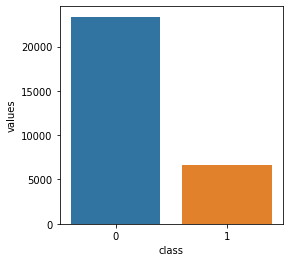

In [9]:
temp = df["class"].value_counts()
df_class = pd.DataFrame({'class': temp.index,'values': temp.values})
plt.figure(figsize = (4,4))
sns.set_color_codes("pastel")
sns.barplot(x = 'class', y="values", data=df_class)
locs, labels = plt.xticks()
plt.show()

We can see there is imbalance in the dataset

## Data Exploration

In [10]:
df.describe()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,class
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Standard deviation for limit_bal is unusually high because of the high maximum value. 
Most people are single or married, have graduate level education, average age being 35-36


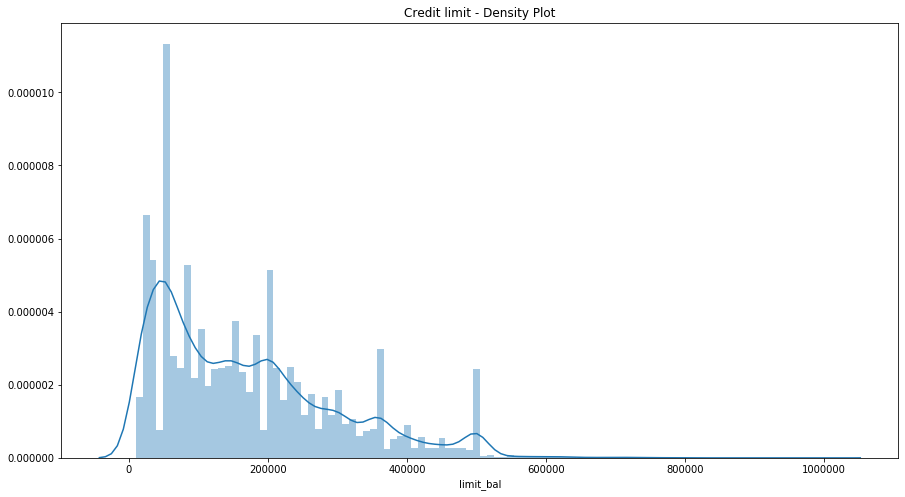

In [11]:
plt.figure(figsize = (15,8))
plt.title('Credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(df['limit_bal'],kde=True,bins=100)
plt.show()

In [12]:
print('Most frequent credit card limits')
df['limit_bal'].value_counts().head(5)


Most frequent credit card limits


50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: limit_bal, dtype: int64

Most cards have credit limits of 50,000

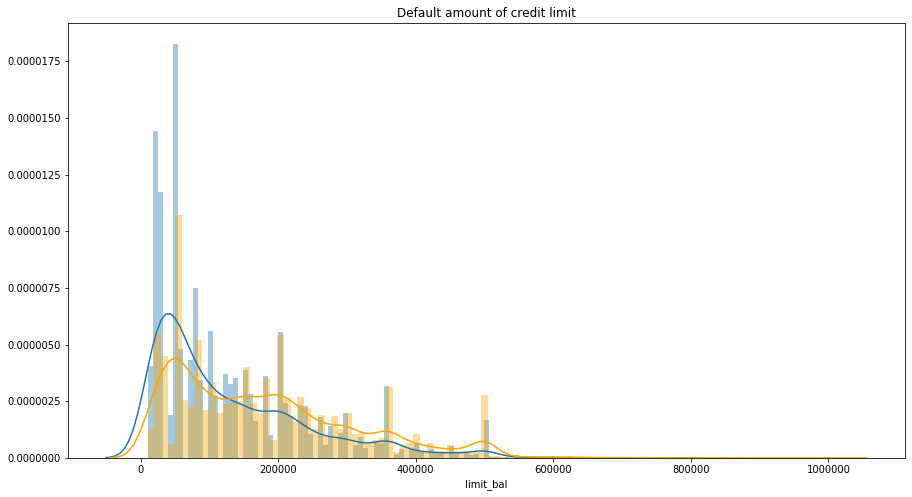

In [13]:
class_0 = df.loc[df['class'] == 0]["limit_bal"]
class_1 = df.loc[df['class'] == 1]["limit_bal"]
plt.figure(figsize = (15,8))
plt.title('Default amount of credit limit')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=100)
sns.distplot(class_0,kde=True,bins=100, color="orange")
plt.show()


Most of the defaults are for  50,000. After 150,000 defaults increases than the non-default cards for each credit limit

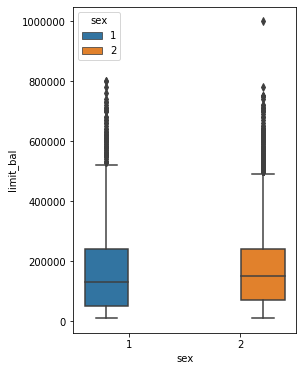

In [14]:
plt.figure( figsize=(4,6))
s = sns.boxplot( x="sex", y="limit_bal", hue="sex",data=df)

Credit limit amount for men and women are balanced

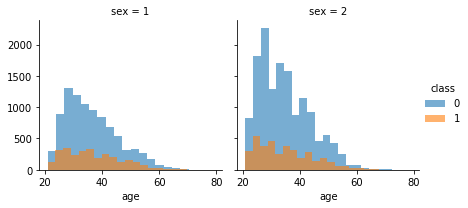

In [15]:
hist_g = sns.FacetGrid(df, col='sex', hue='class')
hist_g.map(plt.hist, 'age', alpha=0.6, bins=20) #alpha is for opacity
hist_g.add_legend()

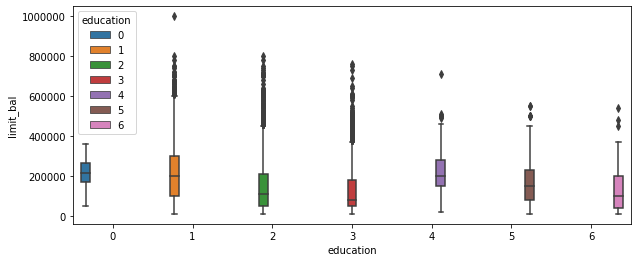

In [16]:
plt.figure( figsize=(10,4))
s = sns.boxplot( x="education", y="limit_bal", hue="education",data=df)

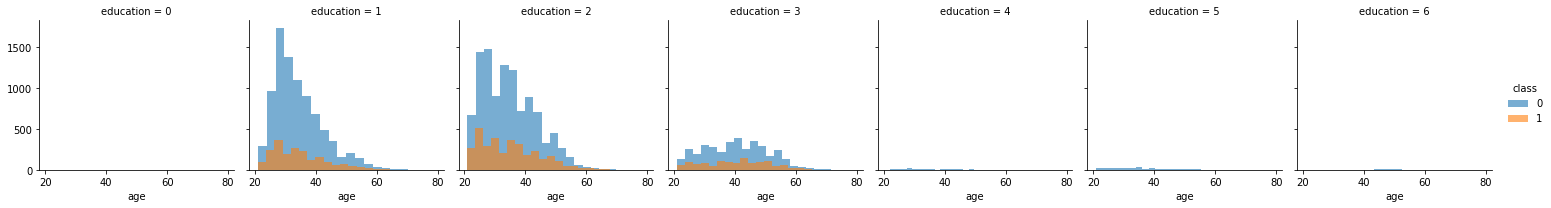

In [17]:
hist_g = sns.FacetGrid(df, col='education', hue='class')
hist_g.map(plt.hist, 'age', alpha=0.6, bins=20) #alpha is for opacity
hist_g.add_legend()

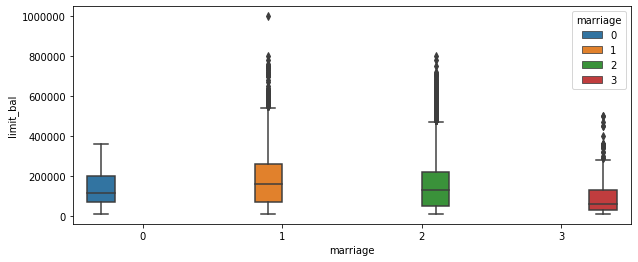

In [18]:
plt.figure( figsize=(10,4))
s = sns.boxplot( x="marriage", y="limit_bal", hue="marriage",data=df)

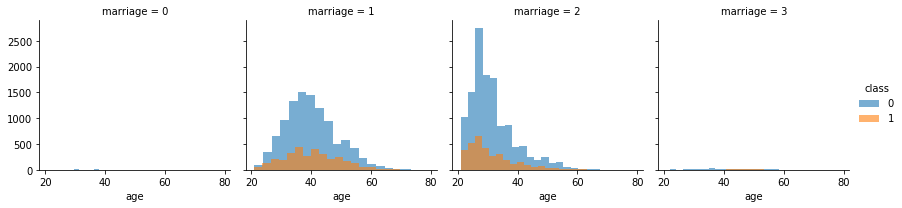

In [19]:
hist_g = sns.FacetGrid(df, col='marriage', hue='class')
hist_g.map(plt.hist, 'age', alpha=0.6, bins=20) #alpha is for opacity
hist_g.add_legend()

In [20]:
def draw_multiple_histograms(df, var, nrows, ncols, nbins,size_row=10,size_cols=8):
    fig=plt.figure(figsize=(size_row,size_cols))
    for i, varname in enumerate(var):
        ax=fig.add_subplot(nrows,ncols,i+1)
        df[varname].hist(bins=nbins,ax=ax)
        #sns.distplot(df[var_name],kde=False,bins=n_bins)
        ax.set_title(varname)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
    



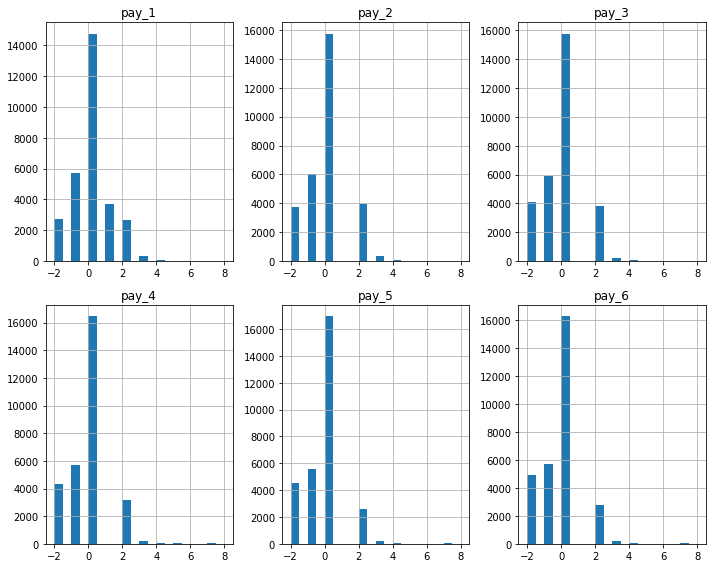

In [21]:
bills = df[['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']]
draw_multiple_histograms(bills, bills.columns, 2, 3, 20)

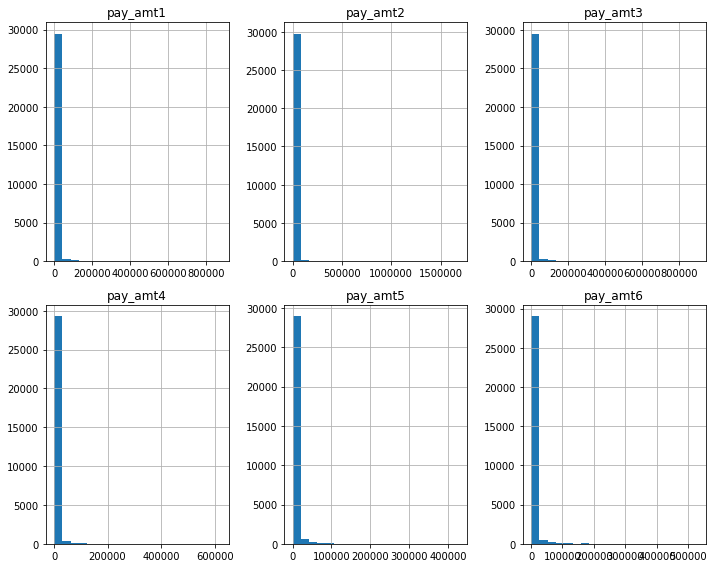

In [22]:
bills = df[['pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']]
draw_multiple_histograms(bills, bills.columns, 2, 3, 20)

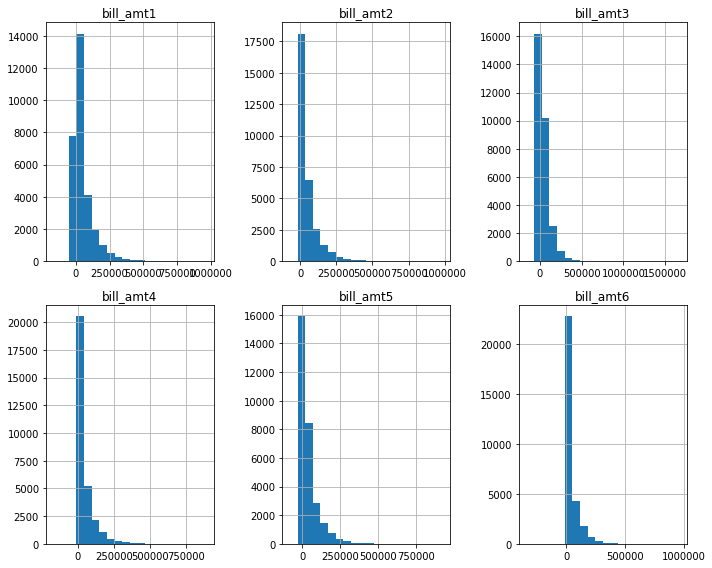

In [23]:
bills = df[['bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5','bill_amt6']]
draw_multiple_histograms(bills, bills.columns, 2, 3, 20)

2    18112
1    11888
Name: sex, dtype: int64


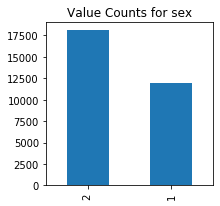

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64


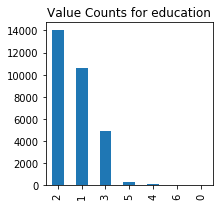

2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64


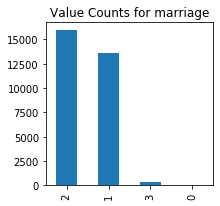

In [24]:
for col in df.columns[1:4]:
    plt.figure(figsize=(3,3))
    plt.title("Value Counts for {}".format(col))
    df[col].value_counts().plot(kind="bar")
    print(df[col].value_counts())
    plt.show()

Unknown labels : Education - 5,6,0  , Marraige -3 

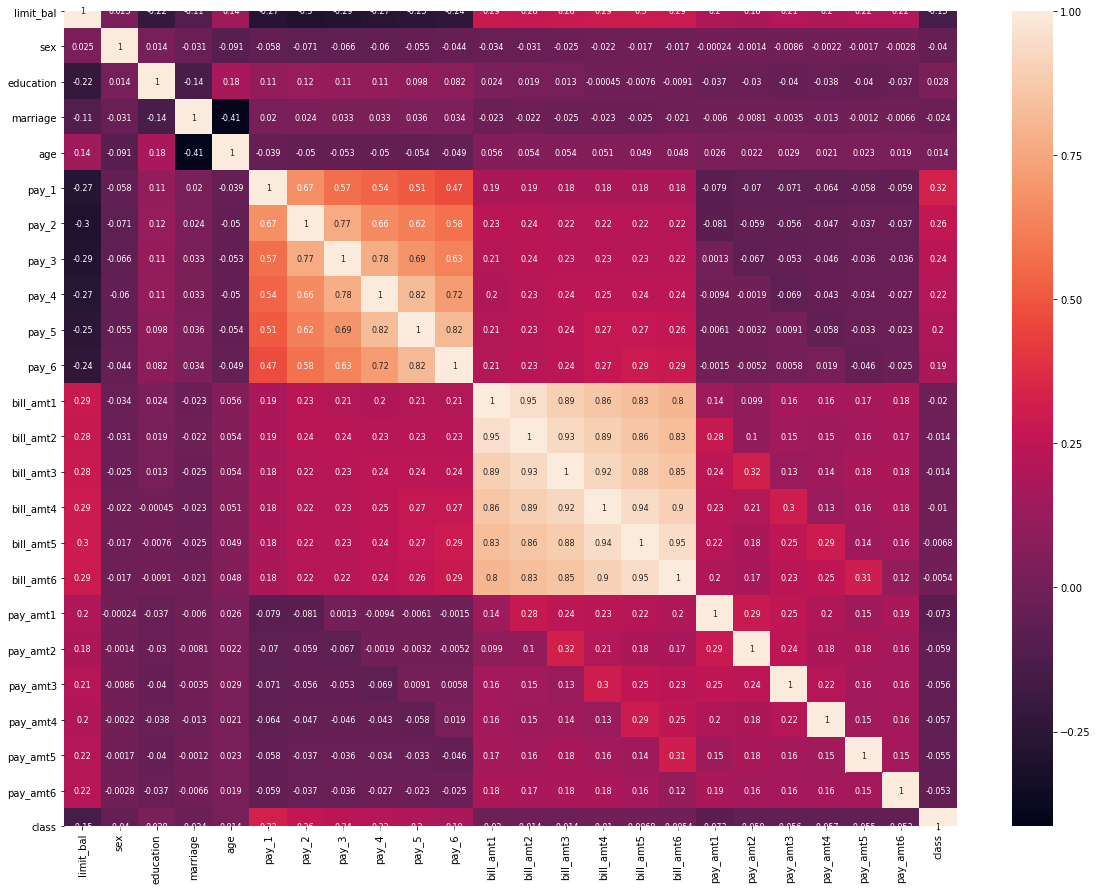

In [25]:
#Correlation between education, marriage, sex & risk category 
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, annot_kws={"size": 8})

From correlation matrix, we can see that there is correlation between the pay and bill_amt features, also among the bill_amt features.  Moreover, the class label is also shown to be correlated with the pay features, indicating they must offer insights while predicting the class labels.

Checking for anomalies and outliers

In [26]:
df[df.pay_amt1 > 400000][['limit_bal', 'pay_1', 'pay_2', 'bill_amt1','bill_amt2', 
                          'pay_amt1', 'pay_amt2', 'class']]


,limit_bal,pay_1,pay_2,bill_amt1,bill_amt2,pay_amt1,pay_amt2,class
8500,400000,-1,-1,6500,405016,405016,0,0
12330,300000,1,-1,-165580,324392,505000,331,0
28003,510000,-1,-1,71121,481382,493358,1227082,0
28716,340000,-1,-1,139808,176743,873552,1215471,0
29820,400000,1,-1,396343,394858,423903,15100,0


In [27]:
df[df.pay_amt2 > 400000][['limit_bal', 'pay_1', 'pay_2', 'bill_amt1','bill_amt2', 
                          'pay_amt1', 'pay_amt2', 'class']]


,limit_bal,pay_1,pay_2,bill_amt1,bill_amt2,pay_amt1,pay_amt2,class
5296,500000,-2,-2,125,-18088,4366,1684259,0
13186,750000,1,-1,9500,9655,250000,401003,0
13863,520000,-2,-2,7322,2728,2728,415552,0
14513,460000,-2,-2,323408,261444,5229,580464,0
25731,80000,0,0,47751,-215,215,1024516,0
28003,510000,-1,-1,71121,481382,493358,1227082,0
28716,340000,-1,-1,139808,176743,873552,1215471,0


Closer look into payment amounts reveals that these are clients with lots of money. That's it. Nothing anomolous here.

## Data Preprocessing


Since we donot know the meaning of the 5,6, and 0 labels for the education, we label all these samples as 4 i.e in other's category

In [28]:
mask = (df.education == 5) | (df.education == 6) | (df.education == 0)
df.loc[mask, 'education'] = 4
df.education.value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

Same way, we unknown label 0 for marriage status is changed to 3 i.e others

In [29]:
mask = (df.marriage == 0) 
df.loc[mask, 'marriage'] = 3
df.marriage.value_counts()

2    15964
1    13659
3      377
Name: marriage, dtype: int64

Moreover, the pay_n features also have ambiguous labels : -2 and 0 . Since -1 means paid duly and 1 means a delay of a month, it becomes confusing what do the labels -2 and 0 mean. However they could all be labelled as 1 under paid duly category as it seems unlikely that they would be related to delayed payments.

In [30]:
for i in range(1,7):
    feature = 'pay_'+str(i)
    mask = (df[feature] == -2) | (df[feature] == -1) | (df[feature] == 0)
    df.loc[mask, feature] = 0

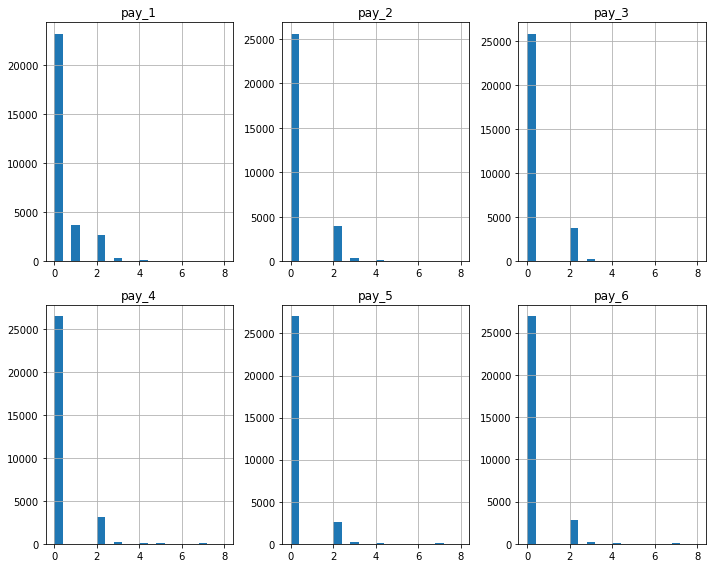

In [31]:
bills = df[['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']]
draw_multiple_histograms(bills, bills.columns, 2, 3, 20)

In [32]:
#df.to_csv('data_v1.csv',index=False)

Since education, marraige and sex are categorical features, we would convert them to binary features for each label possible for that category using one-hot encoding.

In [33]:
df['grad_school'] = (df['education']==1).astype('int')
df['university'] = (df['education']==2).astype('int')
df['high_school'] = (df['education']==3).astype('int')
df['edu_others'] = (df['education']==4).astype('int')

df.drop('education', axis=1, inplace= True)

In [34]:
df['married'] = (df['marriage']==1).astype('int')
df['single'] = (df['marriage']==2).astype('int')
df['mrg_others'] = (df['marriage']==3).astype('int')
df.drop('marriage', axis=1, inplace= True)

In [35]:
df['male'] = (df['sex']==1).astype('int')
df['female'] = (df['sex']==2).astype('int')
df.drop('sex', axis=1, inplace= True)


After data cleaning and preprocessing, our data looks like :

In [36]:
df.head(5)

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,class,grad_school,university,high_school,edu_others,married,single,mrg_others,male,female
0,20000,24,2,2,0,0,0,0,3913,3102,...,1,0,1,0,0,1,0,0,0,1
1,120000,26,0,2,0,0,0,2,2682,1725,...,1,0,1,0,0,0,1,0,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,0,1,0,0,0,1,0,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,0,1,0,0,1,0,0,0,1
4,50000,57,0,0,0,0,0,0,8617,5670,...,0,0,1,0,0,1,0,0,1,0


In [37]:
df.columns

Index(['limit_bal', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'class', 'grad_school',
       'university', 'high_school', 'edu_others', 'married', 'single',
       'mrg_others', 'male', 'female'],
      dtype='object')

In [38]:
df.to_csv('datav1.csv',index=False)